In [182]:
import pandas as pd
import numpy as np

In [183]:
swedish_motor_insurance=pd.read_csv("swedish_motor_insurance.csv")

In [184]:
swedish_motor_insurance.head()

,n_claims,total_payment_SEK
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [185]:
print(swedish_motor_insurance.mean())

n_claims             22.904762
total_payment_SEK    98.187302
dtype: float64


In [186]:
print(swedish_motor_insurance['n_claims'].corr(swedish_motor_insurance['total_payment_SEK']))

0.9128782350234065


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

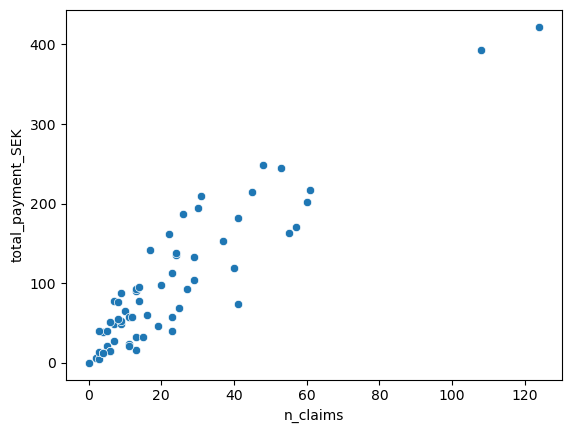

In [188]:
sns.scatterplot(x="n_claims",
               y="total_payment_SEK",
               data=swedish_motor_insurance)
plt.show()

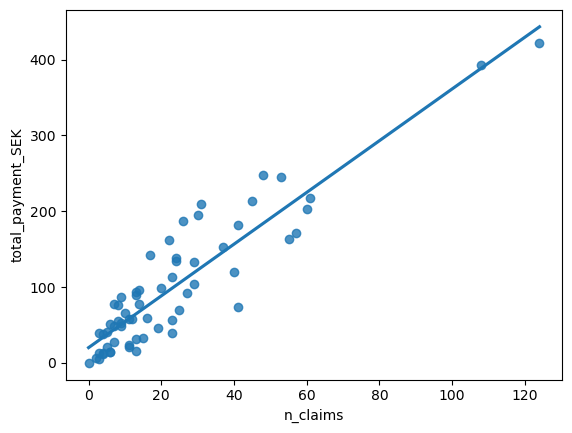

In [189]:
sns.regplot(x="n_claims",
           y="total_payment_SEK",
           data=swedish_motor_insurance,
           ci=None)
plt.show()

In [190]:
from statsmodels.formula.api import ols

In [191]:
mdl_payment_vs_claims=ols("total_payment_SEK ~ n_claims",data=swedish_motor_insurance).fit()

In [192]:
print(mdl_payment_vs_claims)

In [193]:
fish=pd.read_csv("fish.csv")

In [194]:
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


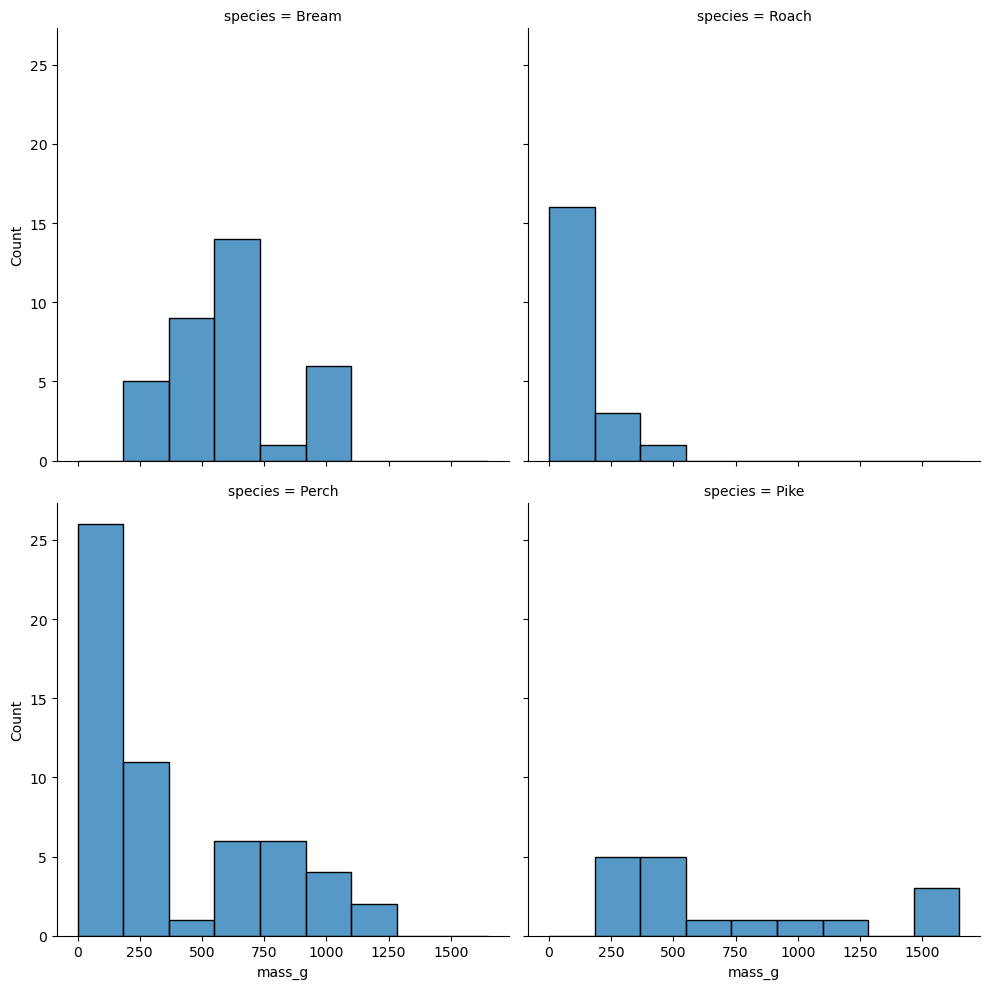

In [195]:
sns.displot(data=fish,
           x="mass_g",
           col="species",
           col_wrap=2,
           bins=9)
plt.show()

In [196]:
summary_stats=fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [197]:
mdl_mass_vs_species=ols("mass_g ~ species",data=fish).fit()
print(mdl_mass_vs_species)

In [198]:
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [199]:
mdl_mass_vs_species=ols("mass_g ~ species +0",data=fish).fit()

In [200]:
print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


In [201]:
bream=fish[fish["species"]=="Bream"]
print(bream.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


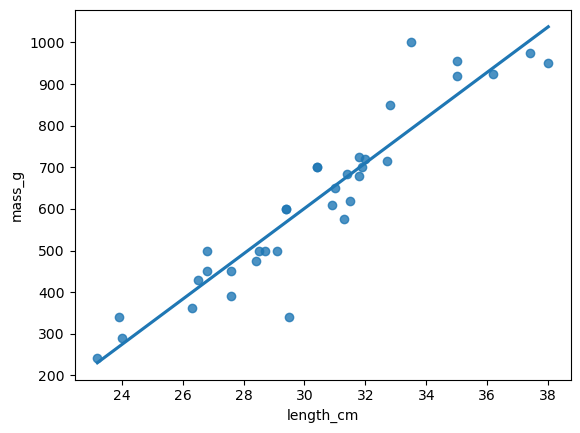

In [202]:
sns.regplot(x="length_cm",
           y="mass_g",
           data=bream,
           ci=None)
plt.show()

In [203]:
mdl_mass_vs_length=ols("mass_g ~ length_cm", data=bream).fit()

In [204]:
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [205]:
explanatory_data=pd.DataFrame({"length_cm":np.arange(20,41)})

In [206]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [207]:
explanatory_data=pd.DataFrame({"length_cm":np.arange(20,41)})
prediction_data=explanatory_data.assign(mass_g=mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


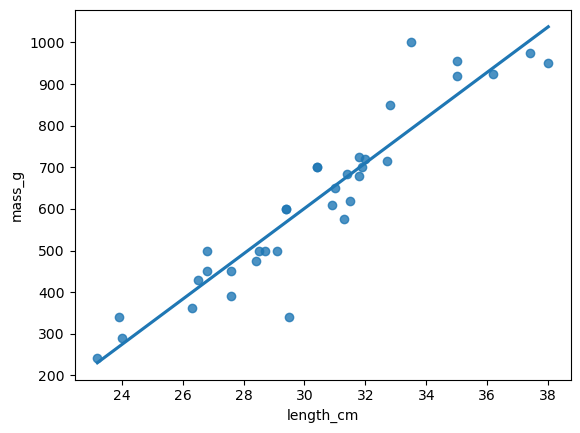

In [208]:
fig=plt.figure()
sns.regplot(x="length_cm",
            y="mass_g",
            ci=None,
            data=bream)
plt.show()

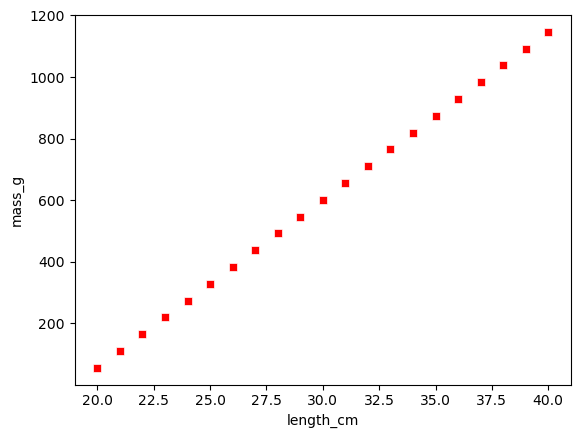

In [209]:
sns.scatterplot(x="length_cm",
               y="mass_g",
               data=prediction_data,
               color="red",
               marker="s")
plt.show()

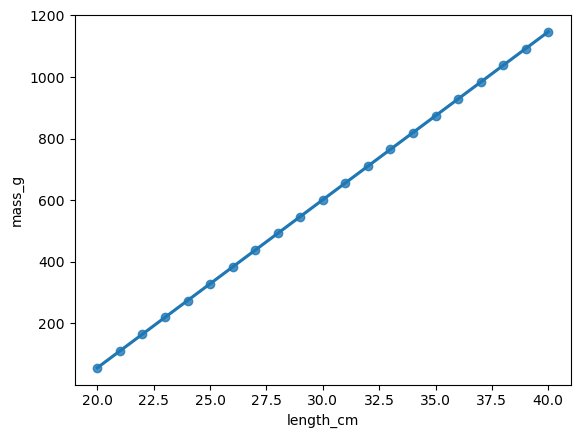

In [210]:
sns.regplot(x="length_cm",
           y="mass_g",
           data=prediction_data,
           ci=None)
plt.show()

In [211]:
little_bream=pd.DataFrame({"length_cm":[10]})

In [212]:
pred_little_bream=little_bream.assign(mass_g=mdl_mass_vs_length.predict(little_bream))
print(pred_little_bream)

   length_cm      mass_g
0         10 -489.847756


In [213]:
explanatory_data=pd.DataFrame({'n_convenience':np.arange(0,11)})

In [214]:
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [215]:
from statsmodels.formula.api import ols

In [216]:
mdl_mass_vs_length=ols("mass_g ~ length_cm",data=bream).fit()
print(mdl_mass_vs_length)

In [217]:
print(mdl_mass_vs_length.fittedvalues)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [218]:
explanatory_data=bream["length_cm"]
print(mdl_mass_vs_length.predict(explanatory_data))

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [219]:
print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [220]:
print(bream["mass_g"]-mdl_mass_vs_length.fittedvalues)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [221]:
mdl_mass_vs_length.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.22e-16
Time:                        15:06:25   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.000   -1255.020    -815.676
length_cm     54.5500      3.539     15.415      0.000      47.350      61.750
==============================================================================
Omnibus:                        7.314   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               10.857
Skew:                          -0.252   Prob(JB):                      0.00439
Kurtosis:                       5.682   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
father_son=pd.read_csv("pearson_dataset.csv")

In [223]:
father_son.head()

,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


<function matplotlib.pyplot.show(close=None, block=None)>

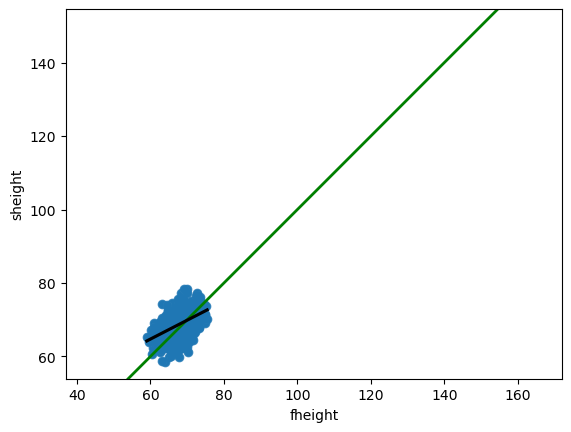

In [224]:
fig=plt.figure()
sns.scatterplot(x="fheight",
               y="sheight",
               data=father_son)
plt.axline(xy1=(150,150),
          slope=1,
          linewidth=2,
          color="green")

sns.regplot(x="fheight",
           y="sheight",
           data=father_son,
           line_kws={"color":"black"})


plt.axis("equal")
plt.show

In [225]:
mdl_son_vs_father=ols("fheight ~ sheight",data=father_son).fit()

In [226]:
print(mdl_son_vs_father)

In [227]:
really_tall_father=pd.DataFrame({"fheight":[1.90]})

In [228]:
#mdl_son_vs_father.predict(really_tall_father)

In [229]:
ad_conversion=pd.read_csv("ad_conversion.csv")

In [230]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [231]:
ad_conversion["sqrt_spent_usd"]=np.sqrt(ad_conversion["spent_usd"])

In [232]:
ad_conversion["sqrt_n_impressions"]=np.sqrt(ad_conversion["n_impressions"])

<AxesSubplot:xlabel='sqrt_spent_usd', ylabel='sqrt_n_impressions'>

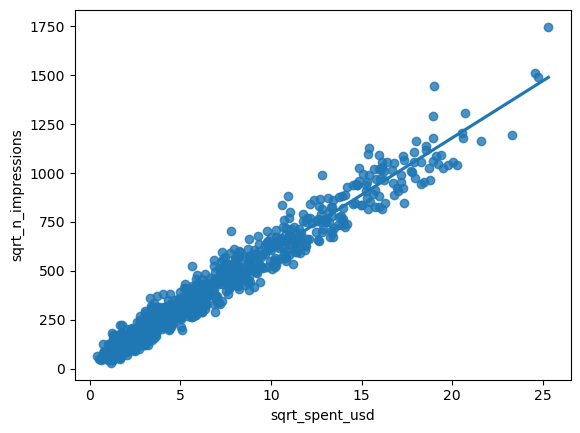

In [233]:
sns.regplot(x="sqrt_spent_usd",
           y="sqrt_n_impressions",
           data=ad_conversion,
           ci=None)

In [234]:
mdl_ad=ols("sqrt_n_impressions ~ sqrt_spent_usd",data=ad_conversion).fit()

In [235]:
explanatory_data=pd.DataFrame({"sqrt_spent_usd":np.sqrt(np.arange(0,601,100)),"spent_usd":np.arange(0,601,100)})

In [236]:
predict_data=explanatory_data.assign(sqrt_n_impressions=mdl_ad.predict(explanatory_data),
                                     n_impressions=mdl_ad.predict(explanatory_data)**2)

In [237]:
print(predict_data)

   sqrt_spent_usd  spent_usd  sqrt_n_impressions  n_impressions
0        0.000000          0           15.319713   2.346936e+02
1       10.000000        100          597.736582   3.572890e+05
2       14.142136        200          838.981547   7.038900e+05
3       17.320508        300         1024.095320   1.048771e+06
4       20.000000        400         1180.153450   1.392762e+06
5       22.360680        500         1317.643422   1.736184e+06
6       24.494897        600         1441.943858   2.079202e+06


In [238]:
ad_conversion["gdrt_n_impressions"]=ad_conversion["n_impressions"]**0.25
ad_conversion["gdrt_n_clicks"]=ad_conversion["n_clicks"]**0.25

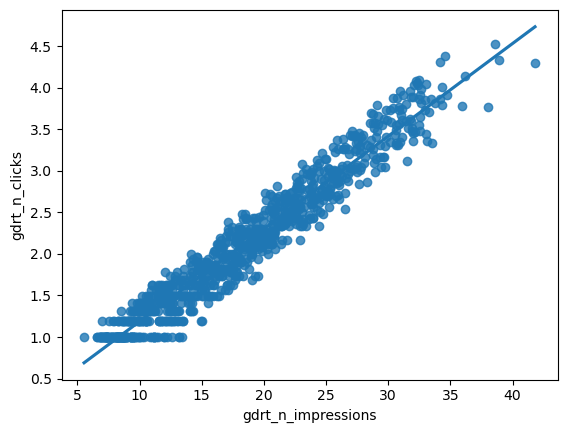

In [239]:
plt.figure()
sns.regplot(x="gdrt_n_impressions",
           y="gdrt_n_clicks",
           data=ad_conversion,
           ci=None)
plt.show()



In [240]:
#R-SQUARED

In [241]:
mdl_bream=ols("mass_g ~ length_cm",data=bream).fit()

In [242]:
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.22e-16
Time:                        15:06:29   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [243]:
print(mdl_bream.rsquared)

0.8780627095147175


In [244]:
coeff_determination=bream["length_cm"].corr(bream["mass_g"])**2
print(coeff_determination)

0.8780627095147175


In [245]:
#RSE

In [246]:
mse=mdl_bream.resid

In [247]:
print('mse:',mse)

mse: 0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [248]:
rse=np.sqrt(mse)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [249]:
print("rse:",rse)

rse: 0      3.433367
1      4.018460
2      8.461857
3           NaN
4      4.446692
5      4.838189
6      8.567851
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14     5.619442
15     5.619442
16     8.776568
17     8.776568
18          NaN
19          NaN
20          NaN
21     2.734623
22          NaN
23          NaN
24          NaN
25     5.065390
26     3.122207
27          NaN
28     9.803478
29    14.419542
30     6.789568
31     9.005456
32          NaN
33          NaN
34          NaN
dtype: float64


In [250]:
residuals_sq=mdl_bream.resid**2
print("residuals_sq:\n",residuals_sq)

residuals_sq:
 0       138.957118
1       260.758635
2      5126.992578
3      1318.919660
4       390.974309
5       547.938023
6      5388.745625
7      6437.159178
8       409.330131
9       373.528738
10     1511.024102
11      914.269381
12     2709.918769
13    54698.391492
14      997.178016
15      997.178016
16     5933.335069
17     5933.335069
18     1619.808598
19       32.511024
20     9421.971076
21       55.922933
22     3966.081668
23      374.106336
24       23.009547
25      658.341757
26       95.026919
27     1185.893986
28     9236.784264
29    43232.058660
30     2125.047026
31     6576.923291
32      206.259713
33      889.335096
34     7665.302003
dtype: float64


In [251]:
residuals_sq=mdl_bream.resid**2

In [252]:
resid_sum_of_sq=sum(residuals_sq)

In [253]:
print("resid sum of sq:",resid_sum_of_sq)

resid sum of sq: 181452.3178041261


In [254]:
deg_freedom=len(bream.index)-2

In [255]:
print("deg_freedom:",deg_freedom)

deg_freedom: 33


In [256]:
rse=np.sqrt(resid_sum_of_sq/deg_freedom)

In [257]:
print("rse:",rse)

rse: 74.15224261594196


Text(0, 0.5, 'Residuals')

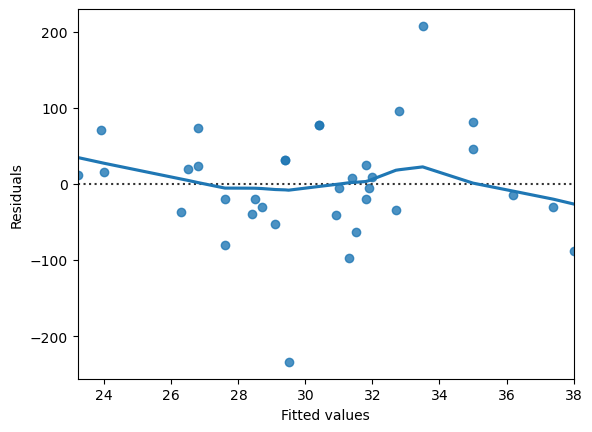

In [258]:
sns.residplot(x="length_cm",y="mass_g",data=bream,lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [259]:
#Q-Q

In [260]:
from statsmodels.api import qqplot

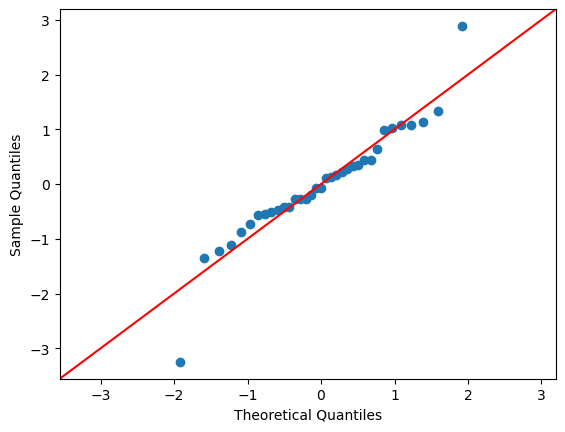

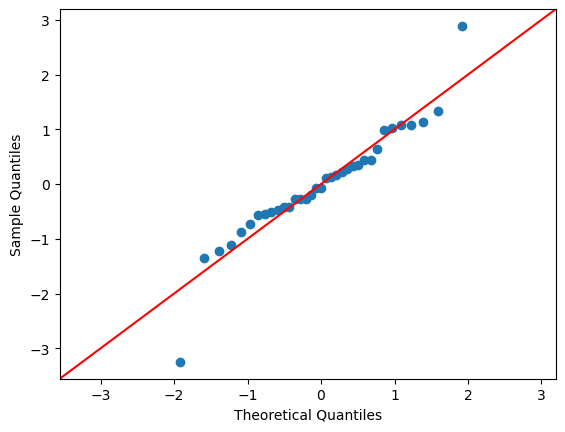

In [261]:
qqplot(data=mdl_bream.resid,fit=True,line="45")

In [262]:
#model_norm_residuals_obs_sqrt_bream=np.sqrt(np.abs(model_norm_residualbream))

In [263]:
model_norm_residuals_bream=mdl_bream.get_influence().resid_studentized_internal

In [264]:
print(model_norm_residuals_bream)

[ 0.171778    0.23202669  1.03053976 -0.50653041  0.2752616   0.3250008
  1.01920737 -1.10732888 -0.27923275 -0.26545967 -0.53414936 -0.41497688
 -0.71349304 -3.20249368  0.43248856  0.43248856  1.05396026  1.05396026
 -0.55091169 -0.07806046 -1.3296735   0.10246504 -0.86313439 -0.26534292
 -0.06582974  0.35199433  0.13383198 -0.4743854   1.32471113  2.87959019
  0.6476984   1.13946224 -0.20503405 -0.43447637 -1.29086493]


In [265]:
model_norm_residuals_abs_sqrt_bream=np.sqrt(np.abs(model_norm_residuals_bream))

In [266]:
print(model_norm_residuals_abs_sqrt_bream)

[0.41446109 0.48169149 1.01515504 0.7117095  0.52465379 0.57008842
 1.00955801 1.05229695 0.52842479 0.51522778 0.73085523 0.64418699
 0.84468517 1.78955125 0.65763863 0.65763863 1.02662567 1.02662567
 0.74223426 0.27939303 1.1531147  0.3201016  0.92905026 0.51511447
 0.25657306 0.5932911  0.36583053 0.68875642 1.15096096 1.69693553
 0.80479712 1.06745597 0.45280686 0.65914822 1.13616237]


Text(0, 0.5, 'sqrt of abs val of stdized residuals')

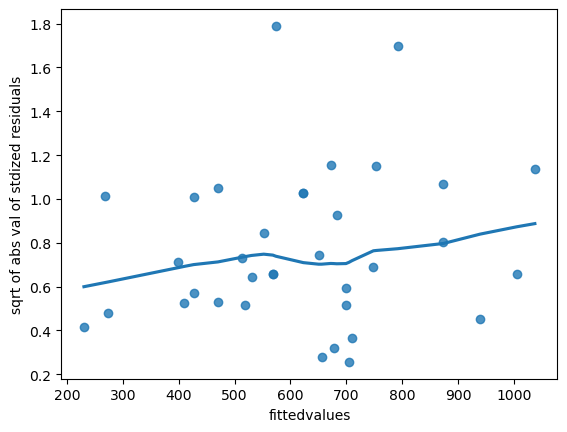

In [267]:
sns.regplot(x=mdl_bream.fittedvalues,y=model_norm_residuals_abs_sqrt_bream,ci=None,lowess=True)
plt.xlabel("fittedvalues")
plt.ylabel("sqrt of abs val of stdized residuals")

In [268]:
#OUTLIERS,LEVERAGE AND INFLUENCE

In [269]:
roach=fish[fish['species']=="Roach"]
print(roach)

   species  mass_g  length_cm
35   Roach    40.0       12.9
36   Roach    69.0       16.5
37   Roach    78.0       17.5
38   Roach    87.0       18.2
39   Roach   120.0       18.6
40   Roach     0.0       19.0
41   Roach   110.0       19.1
42   Roach   120.0       19.4
43   Roach   150.0       20.4
44   Roach   145.0       20.5
45   Roach   160.0       20.5
46   Roach   140.0       21.0
47   Roach   160.0       21.1
48   Roach   169.0       22.0
49   Roach   161.0       22.0
50   Roach   200.0       22.1
51   Roach   180.0       23.6
52   Roach   290.0       24.0
53   Roach   272.0       25.0
54   Roach   390.0       29.5


In [293]:
roach.loc[:,"extreme_L"]=((roach["length_cm"]<25) | (roach["length_cm"]>26))

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='length_cm', ylabel='mass_g'>

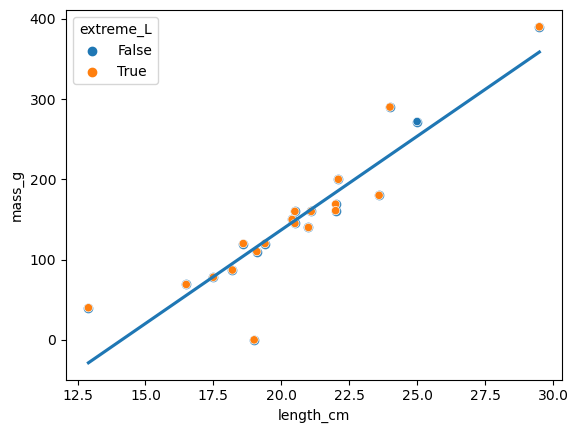

In [272]:
fig=plt.figure()
sns.regplot(x="length_cm",
           y="mass_g",
           data=roach,
           ci=None)
sns.scatterplot(x="length_cm",
               y="mass_g",
               hue="extreme_L",
               data=roach)

In [292]:
roach.loc[:,"extreme_m"]=roach["mass_g"]<1

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:xlabel='length_cm', ylabel='mass_g'>

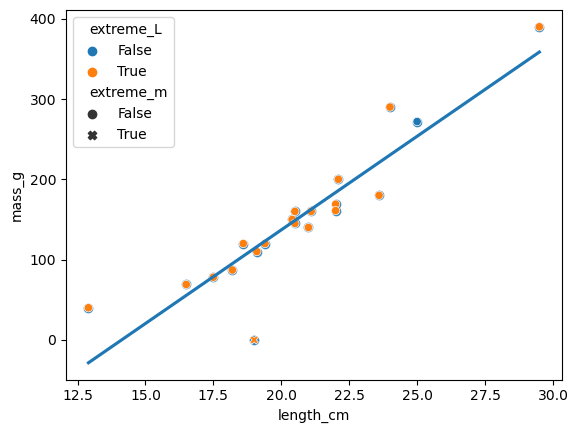

In [276]:
fig=plt.figure()
sns.regplot(x="length_cm",
           y="mass_g",
           data=roach,
           ci=None)
sns.scatterplot(x="length_cm",
               y="mass_g",
               hue="extreme_L",
               style="extreme_m",
               data=roach)

In [278]:
mdl_roach=ols("mass_g ~ length_cm",data=roach).fit()
print(mdl_roach)

In [281]:
summary_roach=mdl_roach.get_influence().summary_frame()
print(summary_roach)

    dfb_Intercept  dfb_length_cm   cooks_d  standard_resid  hat_diag  \
35       1.605912      -1.519147  1.074015        2.167658  0.313729   
36       0.122222      -0.109314  0.010429        0.381169  0.125538   
37      -0.004828       0.004163  0.000020       -0.019557  0.093487   
38      -0.043464       0.035942  0.001980       -0.218961  0.076283   
39       0.072949      -0.058230  0.006610        0.424368  0.068387   
40      -0.643292       0.488301  0.311852       -3.074529  0.061897   
41      -0.022393       0.016726  0.000853       -0.162725  0.060495   
42      -0.009572       0.006724  0.000199       -0.081383  0.056815   
43       0.005115      -0.001595  0.000257        0.098456  0.050264   
44      -0.004478       0.000945  0.000256       -0.098595  0.050092   
45       0.013863      -0.002927  0.002445        0.304524  0.050092   
46      -0.007044      -0.012937  0.007950       -0.546448  0.050554   
47      -0.000448      -0.002153  0.000137       -0.071524  0.05

In [287]:
roach.loc[:,"leverage"]=summary_roach["hat_diag"]

In [294]:
print(roach.head())

   species  mass_g  length_cm  extreme_L  extreme_m  leverage
35   Roach    40.0       12.9       True      False  0.313729
36   Roach    69.0       16.5       True      False  0.125538
37   Roach    78.0       17.5       True      False  0.093487
38   Roach    87.0       18.2       True      False  0.076283
39   Roach   120.0       18.6       True      False  0.068387


In [297]:
roach.loc[:,"cooks_dist"]=summary_roach["cooks_d"]

In [298]:
print(roach.head())

   species  mass_g  length_cm  extreme_L  extreme_m  leverage  cooks_dist
35   Roach    40.0       12.9       True      False  0.313729    1.074015
36   Roach    69.0       16.5       True      False  0.125538    0.010429
37   Roach    78.0       17.5       True      False  0.093487    0.000020
38   Roach    87.0       18.2       True      False  0.076283    0.001980
39   Roach   120.0       18.6       True      False  0.068387    0.006610


In [299]:
print(roach.sort_values("cooks_dist",ascending=False))

         species  mass_g  length_cm  extreme_L  extreme_m  leverage  \
35         Roach    40.0       12.9       True      False  0.313729   
54         Roach   390.0       29.5       True      False  0.394740   
40         Roach     0.0       19.0       True       True  0.061897   
52         Roach   290.0       24.0       True      False  0.099488   
51         Roach   180.0       23.6       True      False  0.088391   
53         Roach   272.0       25.0      False      False  0.133386   
49         Roach   161.0       22.0       True      False  0.058072   
36         Roach    69.0       16.5       True      False  0.125538   
46         Roach   140.0       21.0       True      False  0.050554   
39         Roach   120.0       18.6       True      False  0.068387   
48         Roach   169.0       22.0       True      False  0.058072   
50         Roach   200.0       22.1       True      False  0.059308   
45         Roach   160.0       20.5       True      False  0.050092   
38    

In [300]:
roach_not_short=roach[roach["length_cm"] !=12.9]

<AxesSubplot:xlabel='length_cm', ylabel='mass_g'>

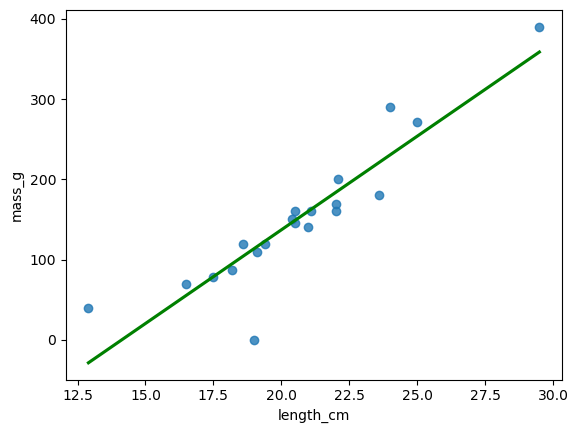

In [303]:
sns.regplot(x="length_cm",
           y="mass_g",
           data=roach,
           ci=None,
           line_kws={"color":"green"}) 

In [ ]:
#LINEAR MODEL

In [304]:
churn=pd.read_csv("churn.csv")

In [305]:
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [306]:
mdl_churn_vs_recency_lm=ols("has_churned ~ time_since_first_purchase",data=churn).fit()

In [308]:
print(mdl_churn_vs_recency_lm.params)

Intercept                    0.497062
time_since_first_purchase   -0.085478
dtype: float64


In [309]:
intercept,slope=mdl_churn_vs_recency_lm.params

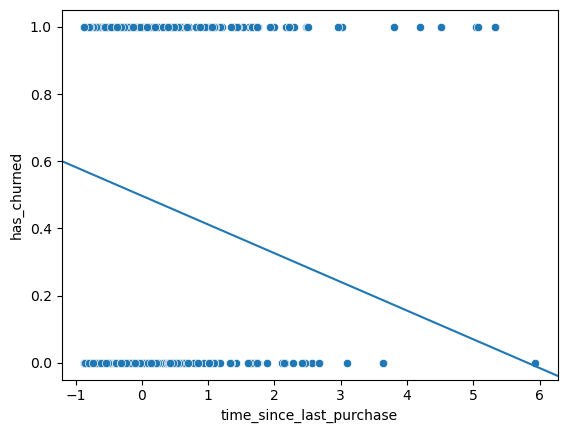

In [316]:
sns.scatterplot(x="time_since_last_purchase",
               y="has_churned",
               data=churn)  

plt.axline(xy1=(0,intercept),
          slope=slope)
plt.show()


In [320]:
from statsmodels.formula.api import logit

In [321]:
mdl_churn_vs_recency_logit=logit("has_churned ~ time_since_last_purchase",data=churn).fit()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


In [322]:
print(mdl_churn_vs_recency_logit.params)

Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


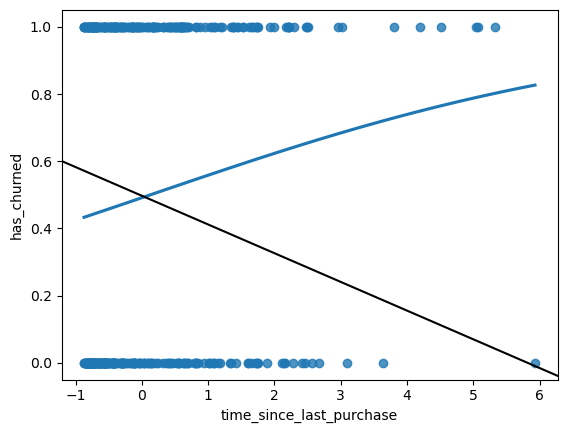

In [324]:
sns.regplot(x="time_since_last_purchase",
           y="has_churned",
           data=churn,
           ci=None,
           logistic=True)

plt.axline(xy1=(0,intercept),
          slope=slope,
          color="black")

plt.show()

In [326]:
mdl_recency=logit("has_churned ~ time_since_last_purchase", data=churn).fit()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


In [327]:
explanatory_data=pd.DataFrame({"time_since_last_purchase":np.arange(-1,6.25,0.25)})

In [329]:
prediction_data=explanatory_data.assign(has_churned=mdl_recency.predict(explanatory_data))

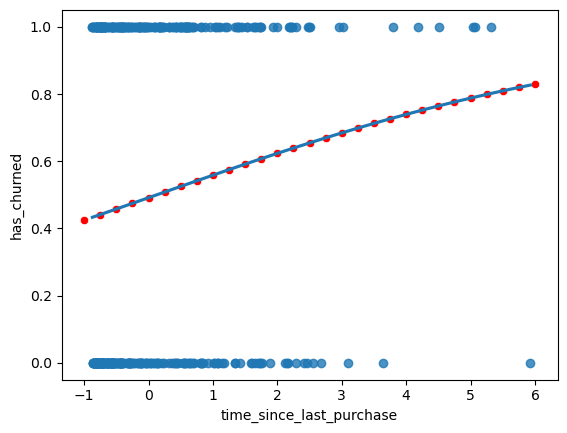

In [331]:
sns.regplot(x="time_since_last_purchase",
           y="has_churned",
           data=churn,
           ci=None,
           logistic=True)

sns.scatterplot(x="time_since_last_purchase",
           y="has_churned",
           data=prediction_data,
           color="red")
plt.show()

In [332]:
prediction_data=explanatory_data.assign(has_churned=mdl_recency.predict(explanatory_data))

In [333]:
prediction_data["most_likely_outcome"]=np.round(prediction_data["has_churned"])

In [334]:
prediction_data["odds_ratio"]=prediction_data["has_churned"]/(1-prediction_data["has_churned"])

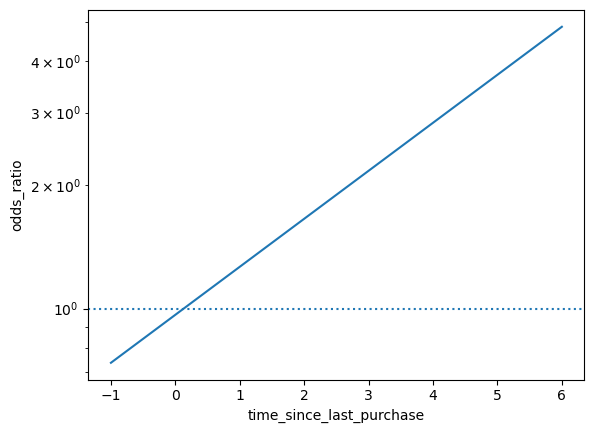

In [339]:
sns.lineplot(x="time_since_last_purchase",
            y="odds_ratio",
            data=prediction_data)

plt.axhline(y=1,
          linestyle="dotted")

plt.yscale("log")

plt.show()

In [340]:
prediction_data["log_odds_ratio"]=np.log(prediction_data["odds_ratio"])

In [341]:
#CONFUSION MATRIX

In [342]:
actual_response=churn["has_churned"]

In [344]:
predict_response=np.round(mdl_recency.predict())
print(predict_response)

[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.

In [349]:
outcomes=pd.DataFrame({"actual_response" :actual_response,
                      "predict_response": predict_response})

In [350]:
print(outcomes.value_counts(sort=False))

actual_response  predict_response
0                0.0                 141
                 1.0                  59
1                0.0                 111
                 1.0                  89
dtype: int64


In [351]:
conf_matrix=mdl_recency.pred_table()
print(conf_matrix)

[[141.  59.]
 [111.  89.]]


In [353]:
from statsmodels.graphics.mosaicplot import mosaic

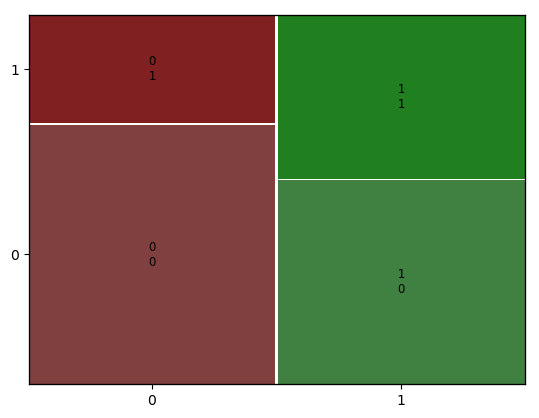

In [355]:
mosaic(conf_matrix)
plt.show()

In [356]:
TN=conf_matrix[0,0]
TP=conf_matrix[1,1]
FN=conf_matrix[1,0]
FP=conf_matrix[0,1]

In [357]:
acc=(TN+TP)/(TN+TP+FN+FP)
print(acc)

0.575


In [358]:
sens=TP/(FN+TP)
print(sens)

0.445


In [359]:
spec=TN/(TN+FP)
print(spec)

0.705
